In [1]:
import sys
import os
import numpy as np
# Get the current directory of the notebook
notebook_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
# Add the 2nd level parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(parent_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import bemt_param_fitter
import inflow_model.propeller_lookup_table as propeller_lookup_table

Prepare data for fitting. 

In [ ]:
import data_factory

# fitting_subfolder = "wind_near_wall_bemt_fitting"
fitting_subfolder = "wind_near_wall_bemt_unit_test"
factory = data_factory.FittingFactory()
data_list = data_factory.generate_data_list(fitting_subfolder, '.pkl')
print(f"Fitting Data list:")
for data in data_list:
    print(data)
datasets = factory.prepare_datasets(data_list)

fitting_subfolder = "wind_near_wall_bemt_fitting_validation"
factory = data_factory.FittingFactory()
data_list = data_factory.generate_data_list(fitting_subfolder, '.pkl')
print(f"Validtion Data list:")
for data in data_list:
    print(data)
datasets_validation = factory.prepare_datasets(data_list)

Fitting Data list:
wind_near_wall_bemt_fitting/figure8_should_not_use\test_wind_near_wall_x0_0_y0_0_z0_0_d0_5_fitting.pkl
wind_near_wall_bemt_fitting/figure8_should_not_use\test_wind_near_wall_x0_0_y0_0_z5_0_d0_5_fitting.pkl
wind_near_wall_bemt_fitting/figure8_should_not_use\test_wind_near_wall_x0_0_y0_0_zn5_0_d0_5_fitting.pkl
wind_near_wall_bemt_fitting/figure8_should_not_use\test_wind_near_wall_xn3_0_y0_0_z0_0_d0_5_fitting.pkl
wind_near_wall_bemt_fitting/figure8_should_not_use\test_wind_near_wall_xn3_0_y0_0_z5_0_d0_5_fitting.pkl
wind_near_wall_bemt_fitting/figure8_should_not_use\test_wind_near_wall_xn3_0_y0_0_zn5_0_d0_5_fitting.pkl
Validtion Data list:
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_z10_0_d0_5_validation.pkl
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_z1_0_d0_5_validation.pkl
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_z4_0_d0_5_validation.pkl
wind_near_wall_bemt_fitting_validation\test_wind_near_

Current loss: 0.6673925147854236


0.6673925147854236

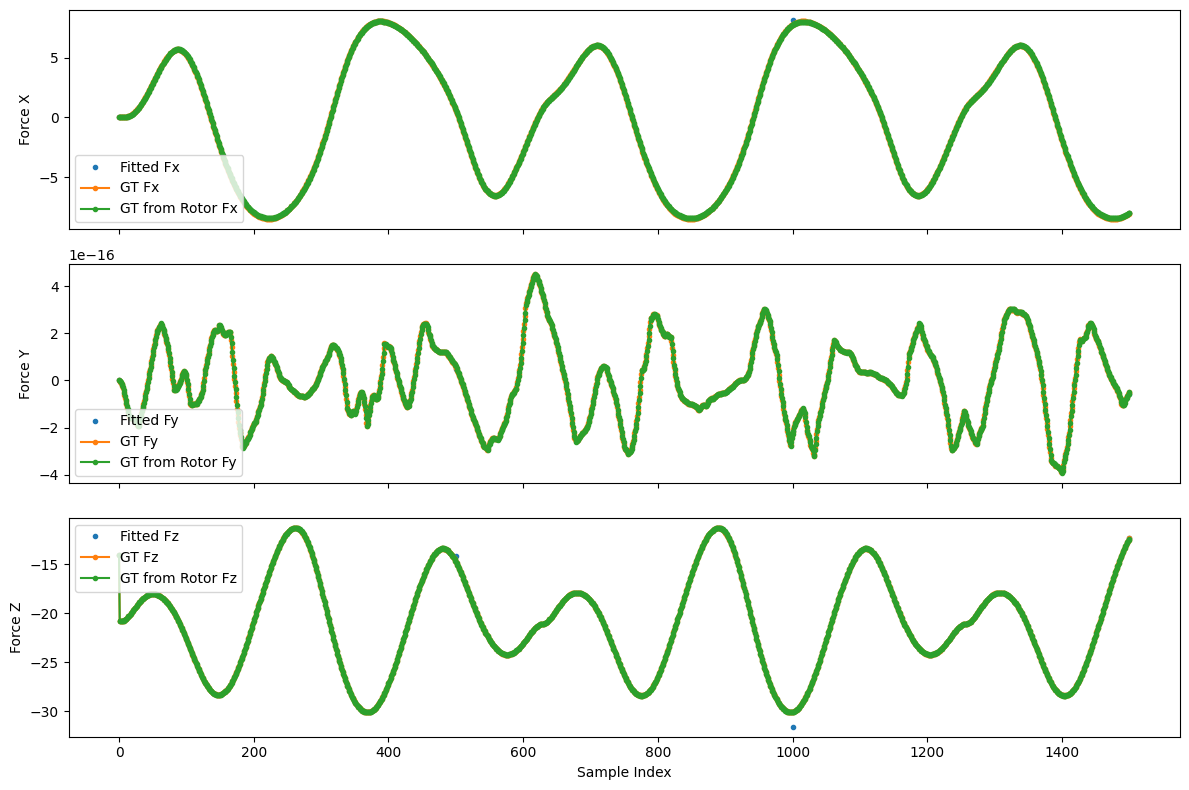

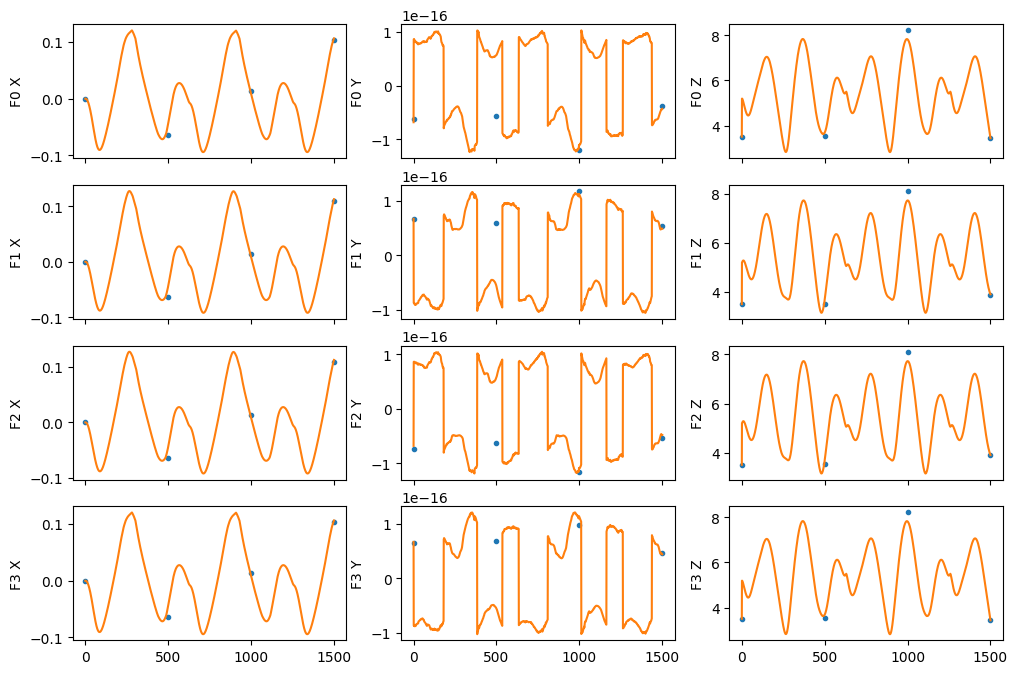

In [7]:
fitter = bemt_param_fitter.BemtParamFitter()
x = np.array([5.3, 1.7, 1.8, np.radians(20.6)]) # ground truth
fitter.adjust_resolution(True)
fitter.get_loss(x, datasets[:2], can_log=True)
# fitter.get_loss(x, datasets_validation, can_log=True)

Current loss: 0.6673925147854236


0.6673925147854236

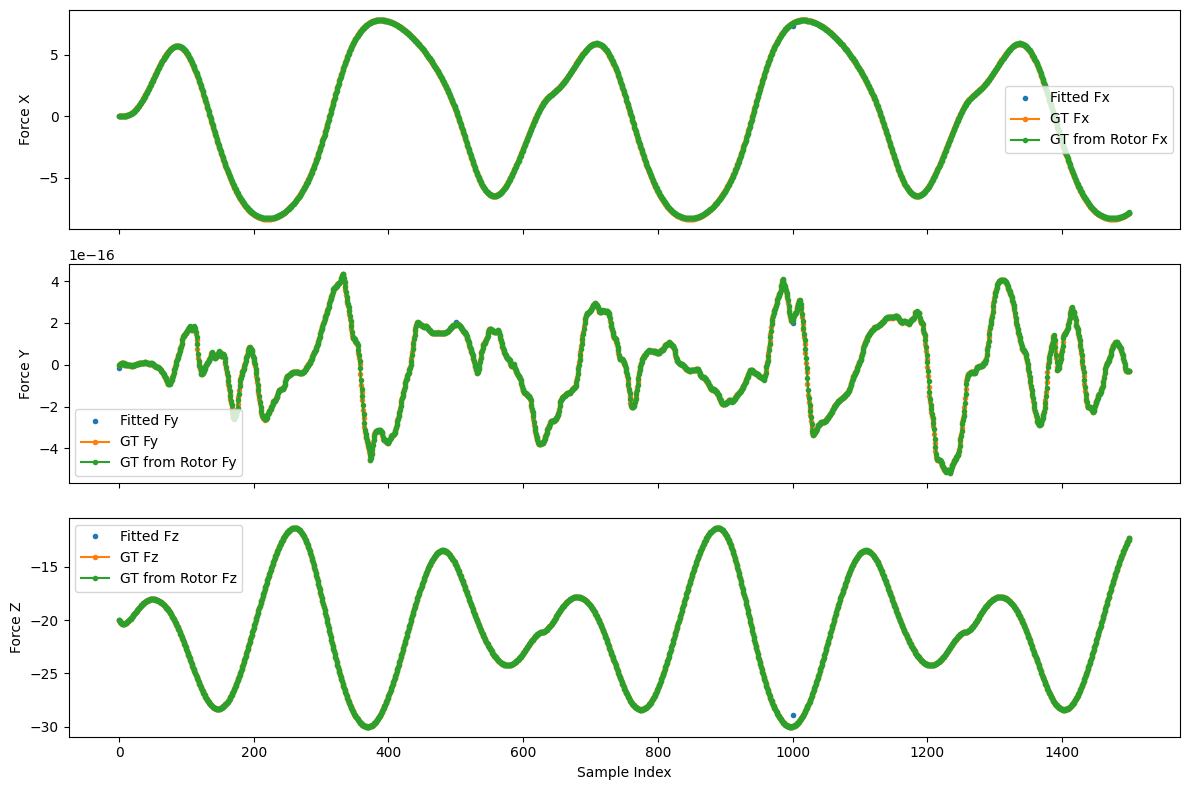

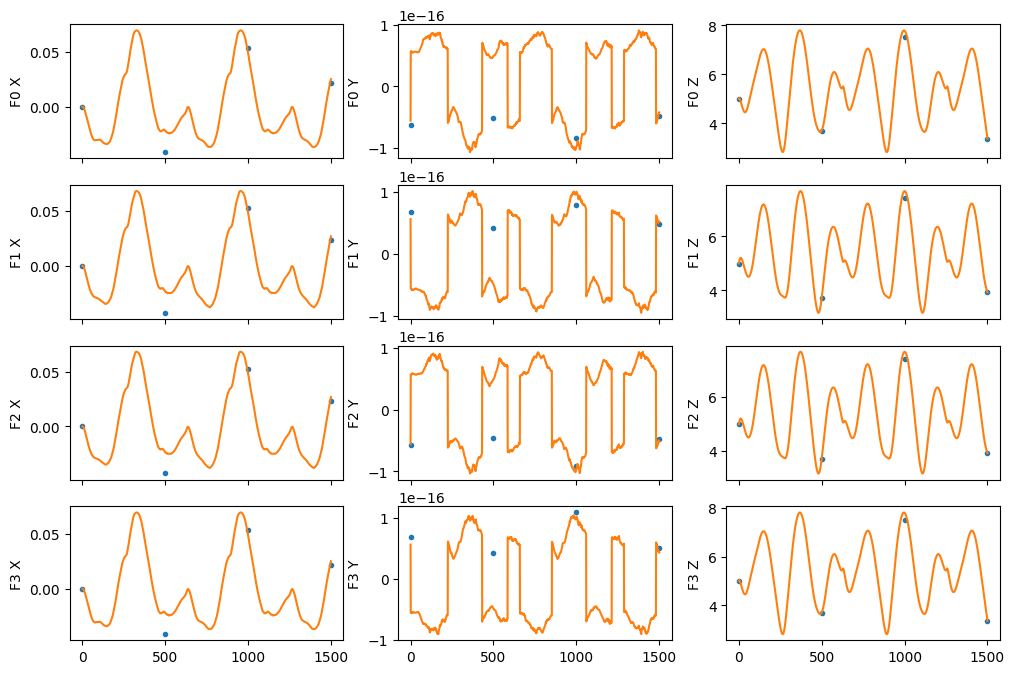

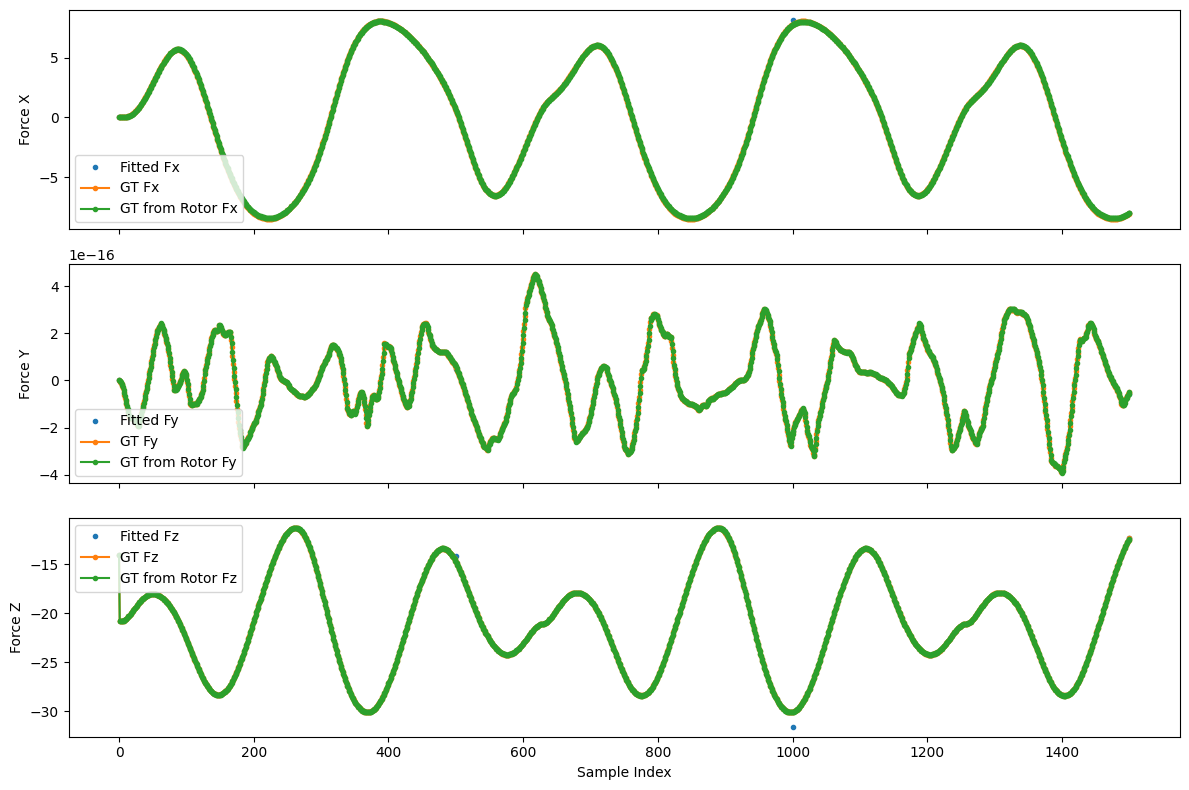

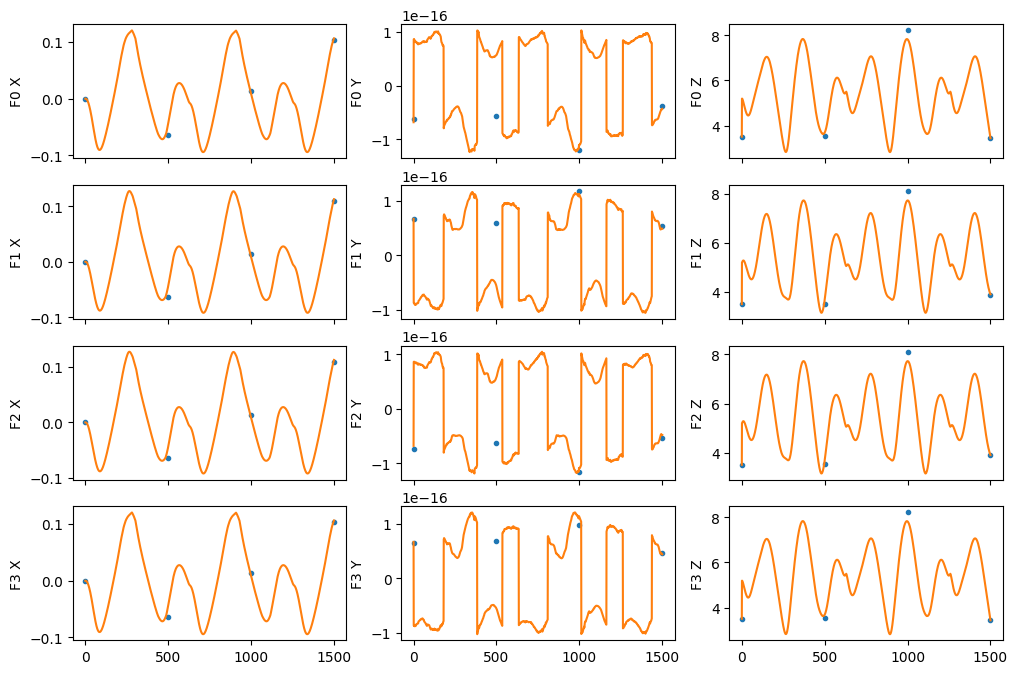

In [8]:
x = np.array([5.3, 1.7, 1.8, np.radians(20.6)]) # ground truth
# x = np.array([2., 4.33202413, 0., 0.17453294])    # initial guess from below
# x = np.array([5.34535047, 1.49428897, 1.63329779, 0.46934187])   # initial guess from above
blade = bemt_param_fitter.FittedBlade()
bemt_param_fitter.get_loss(x, datasets[:2], blade, is_in_validation=True)

In [ ]:
blade = bemt_param_fitter.FittedBlade()
fitted_params = bemt_param_fitter.fit_params(datasets, blade, np.array([5.31194203, 1.46627105, 1.72517079, 0.45174155]), is_fine_tune=True)

Generate a lookup table using inflow_model.propeller_lookup_table_users_guide.ipynb and check the loss over all sammple data.

In [ ]:
lookup_table = propeller_lookup_table.PropellerLookupTable.Reader("apc_8x6_fitted")
# lookup_table = propeller_lookup_table.PropellerLookupTable.Reader("apc_8x6_fitted2")
# lookup_table = propeller_lookup_table.PropellerLookupTable.Reader("apc_8x6_with_trail")
bemt_param_fitter.test_fitted_lookup_table(datasets, lookup_table)